# Projeto Prático 1.1 -- Explorando Dados

O projeto prático 1.1 da disciplina de Redes Neurais Artificiais deve ser desenvolvido em duplas justas. A ideia geral é seguir o passo a passo das atividades solicitadas para aprender a utilizar as bibliotecas Python para praticar os conceitos de exploração de dados vistos ao longo dessas primeiras aulas.

Na avaliação será levado em conta:
1. Corretude das tarefas solicitadas
2. Qualidade e boas práticas de codificação
3. Eficiência na manipulação dos dados


Preecha aqui os integrantes da dupla e suas respectivas matrículas (duplo clique para editar):
- Felipe Getúlio Laranjeira do Nascimento 1515080534
- Lucas Pereira Reis 1515080583

## Apresentação da Atividade

Vamos aprender um pouco mais sobre carros! Para tanto, vamos utilizar o [dataset AutoMPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg), que contém informações de veículos do ano de 1983 apresentados em uma exposição nos EUA. O atributo alvo chama-se mpg, denotando milhas por galão, uma unidade de medida equivalente ao nosso quilômetro por litro.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from sklearn.model_selection import train_test_split
import seaborn as sns

## Tarefa 1: Abrir o dataset

1. Baixe o arquivo 'autompg.csv' do Google Classroom e o abra com a biblioteca pandas
2. Imprima o cabeçalho do dataset
3. Imprima os tipos de dados no dataset

In [2]:
df = pd.read_csv('autompg.csv', delimiter=';')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [4]:
df.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
modelyear       float64
origin          float64
name             object
dtype: object

## Tarefa 2: Conhecendo e limpando os dados

1. Imprima os nomes das colunas do datase
2. Quantos exemplos o dataset possui?
3. Quantos exemplos com dados faltantes o dataset possui?
4. Efetue a limpeza do dataset excluindo todos os exemplos em que há alguma informação faltando. Daqui em diante, considere essa versão do dataset.

In [5]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'modelyear', 'origin', 'name'],
      dtype='object')

In [6]:
len(df)

406

In [7]:
df.isnull().values.sum()

14

In [8]:
df.dropna(inplace=True)

## Tarefa 3: Consulta aos dados

1. Calcule a média do atributo alvo mpg
2. Imprima o nome dos carros cujo consumo (mpg) é maior que a média
3. Qual o carro mais eficiente (maior mpg)?
4. Quantos carros foram fabricados após 1977?
5. Qual a cilindrada média dos carros fabricados entre 1980 e 1982?
6. Há quantos carros da marca Chevrolet no dataset? Imprima todas as características dos mesmos.

In [9]:
df['mpg'].mean()

23.44591836734694

In [10]:
df['name'].loc[df['mpg'] > df['mpg'].mean()]

20                 toyota corona mark ii
24                          datsun pl510
25          volkswagen 1131 deluxe sedan
26                           peugeot 504
27                           audi 100 ls
28                              saab 99e
29                              bmw 2002
35                          datsun pl510
36                   chevrolet vega 2300
37                         toyota corona
57                             opel 1900
58                           peugeot 304
59                             fiat 124b
60                   toyota corolla 1200
61                           datsun 1200
62                  volkswagen model 111
63                      plymouth cricket
64                 toyota corona hardtop
65                    dodge colt hardtop
86                       renault 12 (sw)
88                       datsun 510 (sw)
90                       dodge colt (sw)
91              toyota corolla 1600 (sw)
109              volkswagen super beetle
121             

In [11]:
df['name'].loc[df['mpg'] == max(df['mpg'].values)]

329    mazda glc
Name: name, dtype: object

In [12]:
len(df.loc[df['modelyear'] > 77.0])

150

In [13]:
df_modelyear = df.loc[(df['modelyear'] >= 80.0) & (df['modelyear'] <= 82.0)]
df_modelyear['cylinders'].mean()

4.329411764705882

In [14]:
#Quantidade de carros da marca Chevrolet
len(df[df['name'].str.match('chevrolet')])

43

In [15]:
#Todas as características
df[df['name'].str.match('chevrolet')]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
18,15.0,8.0,400.0,150.0,3761.0,9.5,70.0,1.0,chevrolet monte carlo
36,28.0,4.0,140.0,90.0,2264.0,15.5,71.0,1.0,chevrolet vega 2300
42,17.0,6.0,250.0,100.0,3329.0,15.5,71.0,1.0,chevrolet chevelle malibu
45,14.0,8.0,350.0,165.0,4209.0,12.0,71.0,1.0,chevrolet impala
53,22.0,4.0,140.0,72.0,2408.0,19.0,71.0,1.0,chevrolet vega (sw)
67,20.0,4.0,140.0,90.0,2408.0,19.5,72.0,1.0,chevrolet vega
69,13.0,8.0,350.0,165.0,4274.0,12.0,72.0,1.0,chevrolet impala
80,13.0,8.0,307.0,130.0,4098.0,14.0,72.0,1.0,chevrolet chevelle concours (sw)


## Tarefa 4: Estatística Descritiva

Para o atributo alvo 'mpg', calcule:
 1. Média
 2. Mediana
 3. Máximo
 4. Mínimo
 5. Desvio Padrão
 6. Skewness
 7. Curtose
 6. Há outliers? (Valores de mpg acima ou abaixo da média + 2 desvios padrões)?
 7. Responda: O que se pode afirmar a respeito da distribuição de dados desse atributo?

In [16]:
#Média
mean = df['mpg'].mean()
mean

23.44591836734694

In [17]:
np.median(df['mpg'])

22.75

In [18]:
max(df['mpg'])

46.6

In [19]:
min(df['mpg'])

9.0

In [20]:
std = np.std(df['mpg'])
std

7.795045762682584

In [21]:
skew(df['mpg'])

0.45534138282810366

In [22]:
kurtosis(df['mpg'])

-0.52470258338766

In [23]:
df_aux = df.loc[(df['mpg'] >= (mean - 2 * std)) & (df['mpg'] <= (mean + 2 * std))]
if(len(df_aux)):
    print(f"Quantidade de outliers : {len(df) - len(df_aux)}")

Quantidade de outliers : 10


**Resposta:** Sim, existem 10 *outliers* no *dataset*.

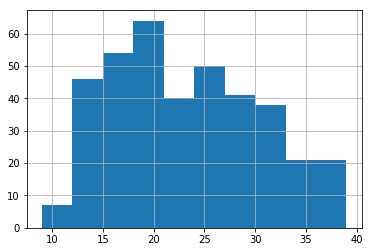

In [24]:
plt.hist(df_aux['mpg'])
plt.grid(True)
plt.show()

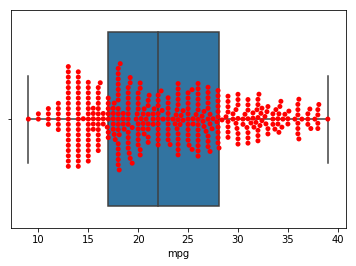

In [25]:
ax = sns.boxplot(df_aux['mpg'])
ax = sns.swarmplot(df_aux['mpg'],color="red")

**Resposta**: Como pode ser visto no histograma e no *boxplot*, os dados não estão muito dispersos mas há uma concentração maior de dados em valores abaixo de 23 *mpg*, ou seja, uma grande parte dos valores se concentra abaixo da mediana, caracterizando uma distribuição assimétrica.

## Tarefa 5: Identificando correlações

1. Qual a correlação entre o peso do chassi (weight) e o consumo (mpg)?
2. Essa medida de correlação é mais forte ao considerarmos apenas os carros da marca Toyota?
3. Qual a correlação entre a potência (horsepower) e o consumo (mpg) para os veículos do dataset?

In [26]:
df['weight'].corr(df['mpg'])

-0.8322442148315753

In [27]:
df_toyota = df[df['name'].str.match('toyota')]
df_toyota['weight'].corr(df['mpg'])

-0.6061073334078747

**Resposta**: Como pode ser visto, a correlação de *Pearson* apresentou um valor maior, ou seja, a correlação é mais forte.

In [28]:
df['horsepower'].corr(df['mpg'])

-0.7784267838977759

## Tarefa 6: Preparando uma partição do tipo Holdout

1. Remova do dataset a coluna 'name'
2. Exclua o atributo alvo mpg do dataset e o atribua a uma variável Y
3. Efetue uma partição holdout 70/30 utilizando o sci-kit learn.
 - Para auxiliar, consulte a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [29]:
df.drop(['name'],axis=1,inplace=True)

In [30]:
Y = df['mpg']
df.drop(['mpg'],axis=1,inplace=True)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(df,Y,test_size=0.3,shuffle=True)